In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from hypopt import GridSearch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


In [2]:
main_hea = pd.read_csv("Final_HEA_Classifier.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Final_HEA_Classifier.csv'

In [44]:
main_hea.isnull().values.any()

False

In [45]:
features = ['Hf', 'Cr', 'V', 'Cu', 'Al', 'Pt', 'Co', 'Ni', 'Ta', 'Fe', 'Nb', 'Mo','W', 'Zr', 'Mn']
X = main_hea[features]#, errors = 'ignore'.astype('float').values
y = main_hea['HEA/Non-HEA'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)


In [46]:
print(type(y_train),y_train.shape)

<class 'numpy.ndarray'> (1320,)


In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1320, 15) (1320,) (567, 15) (567,)


Logistic Regression

In [48]:
penalty = ["l2", "l1", "elasticnet"]
intercept_scaling = [x for x in np.arange(0.6,1.4,0.2)]
C =  [x for x in np.arange(0,1.2,0.05)] 
tol = [x for x in np.arange(0,0.004,0.0005)] 
random_state=[0]

random_grid = {'penalty': penalty,
               'tol': tol,
               'C':C,
               'random_state':random_state
               }
              
lr = GridSearch(model = LogisticRegression(),param_grid=random_grid,cv_folds=5)    
lr_model = lr.fit(X_train, np.array(y_train))

In [49]:
lr_model.get_params()

{'C': 1.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0,
 'verbose': 0,
 'warm_start': False}

Support Vector Classifier(SVC)

In [50]:
kernel = ["linear", "poly", "rbf", "sigmoid"] 
degree = [2,3,4]
coef0 = [x for x in np.arange(0,0.5,0.05)]
C =  [x for x in np.arange(0,1.2,0.05)]
random_state=[0]
probability = [True]

random_grid = {'kernel': kernel,
               'degree': degree,
               'coef0':coef0,
               'C':C,
               'random_state':random_state,
               'probability':probability
               }
             
svc = GridSearch(model = SVC(),param_grid=random_grid,cv_folds=5)    
svc_model = svc.fit(X_train, np.array(y_train))

In [51]:
svc_model.get_params()

{'C': 0.9,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

KNeighbors Classifier

In [52]:
leaf_size = list(range(25,40,2))
n_neighbors = list(range(3,12))
algorithm = ["auto", "ball_tree", "kd_tree","brute"]
p = [1,2]

random_grid = {'leaf_size': leaf_size,
               'n_neighbors': n_neighbors,
               'algorithm':algorithm,
               'p':p
               }
              
knc = GridSearch(model = KNeighborsClassifier(),param_grid=random_grid,cv_folds=5)    
kneighbors_model = knc.fit(X_train, np.array(y_train))

In [53]:
kneighbors_model.get_params()

{'algorithm': 'brute',
 'leaf_size': 25,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

Gradient Boosting Classifier

In [54]:
n_estimators = list(range(80,105,5))
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,12)) 
min_samples_leaf = list(range(1,3)) 

learning_rate = list(np.arange(0,0.35,0.05)) 
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'learning_rate':learning_rate,
               'random_state':random_state
               }
              
gbc = GridSearch(model = GradientBoostingClassifier(),param_grid=random_grid,cv_folds=5)    
gradientBoosting_model = gbc.fit(X_train, np.array(y_train))

In [55]:
gradientBoosting_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 85,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Random Forest Classifier

In [56]:
n_estimators = list(range(70,130,5))
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,15))
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'max_features':max_features,
               'random_state':random_state
               }
              
rfc = GridSearch(model = RandomForestClassifier(),param_grid=random_grid,cv_folds=5)    
RFC_model = rfc.fit(X_train, np.array(y_train))

In [57]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 115,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Extreme Gradient Boosting (XGB) Classifier

In [58]:
booster = ['gbtree', 'gblinear', 'dart']
eta = list(np.arange(0,1, 0.05)) 
max_depth = list(range(3,10)) 

random_grid = {'booster': booster,
               'eta': eta,
               'max_depth':max_depth
               }
              
xgbc = GridSearch(model = XGBClassifier(),param_grid=random_grid,cv_folds=5)    
XGB_Classifier_model = xgbc.fit(X_train, np.array(y_train))

/Users/yashug/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/yashug/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/yashug/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/yashug/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

In [59]:
XGB_Classifier_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.05}

Decision Tree Classifier

In [60]:
min_samples_split = list(range(2,5)) 
max_depth = list(range(1,15)) 
min_samples_leaf = list(range(1,3)) 
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'random_state':random_state
               }
         
dtc = GridSearch(model = DecisionTreeClassifier(),param_grid=random_grid,cv_folds=5)    
DTC_model = dtc.fit(X_train, np.array(y_train))

In [61]:
DTC_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [62]:
filename = 'Models/classifier_XGB_Classifier.sav'
pickle.dump(XGB_Classifier_model, open(filename, 'wb'))

Computing Metrics

In [63]:
# Logistic Regression Metrics
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

lr_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
lr_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)



# Support Vector Classifier Metrics
train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

svc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
svc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)


# KNeighbors Metrics
train_pred = kneighbors_model.predict(X_train)
test_pred = kneighbors_model.predict(X_test)

knc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
knc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)



#Gradient Boosting Metrics
train_pred = gradientBoosting_model.predict(X_train)
test_pred = gradientBoosting_model.predict(X_test)

gbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
gbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)



# Random Forest Metrics
train_pred = RFC_model.predict(X_train)
test_pred = RFC_model.predict(X_test)

rfc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
rfc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

rfc_Precision_Train = precision_score(np.array(y_train), train_pred)
rfc_Precision_Test = precision_score(np.array(y_test), test_pred)



# Extreme Gradient Boosting Metrics
train_pred = XGB_Classifier_model.predict(X_train)
test_pred = XGB_Classifier_model.predict(X_test)

xgbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
xgbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)


# Decision Tree Metrics
train_pred = DTC_model.predict(X_train)
test_pred = DTC_model.predict(X_test)

dtc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
dtc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

dtc_Precision_Train = precision_score(np.array(y_train), train_pred)
dtc_Precision_Test = precision_score(np.array(y_test), test_pred)



In [64]:
models_classifier_comparison = pd.DataFrame({
    'Model'          : ['Logistic Regression', 'Support Vector Classifier','KNeighbors Classifier', 'Gradient Boosting Classifier', 'Random Forest Classifier', 'XGB Classifier', 'Decision Tree Classifier'],
    'Train Accuracy' : [lr_Accuracy_Train, svc_Accuracy_Train,knc_Accuracy_Train, gbc_Accuracy_Train,rfc_Accuracy_Train, xgbc_Accuracy_Train, dtc_Accuracy_Train],
    'Test Accuracy'  : [lr_Accuracy_Test, svc_Accuracy_Test,knc_Accuracy_Test, gbc_Accuracy_Test, rfc_Accuracy_Test, xgbc_Accuracy_Test, dtc_Accuracy_Test]
    
    }, columns = ['Model', 'Train Accuracy', 'Test Accuracy'])

models_classifier_comparison.sort_values(by='Test Accuracy', ascending=False)

Model  Train Accuracy  Test Accuracy
2         KNeighbors Classifier        0.748485       0.740741
4      Random Forest Classifier        0.799242       0.740741
3  Gradient Boosting Classifier        0.815152       0.735450
5                XGB Classifier        0.790152       0.731922
1     Support Vector Classifier        0.770455       0.726631
6      Decision Tree Classifier        0.750000       0.691358
0           Logistic Regression        0.674242       0.656085

In [65]:
models_classifier_comparison.to_csv("HEA_Classifier_results_dataframe.csv")

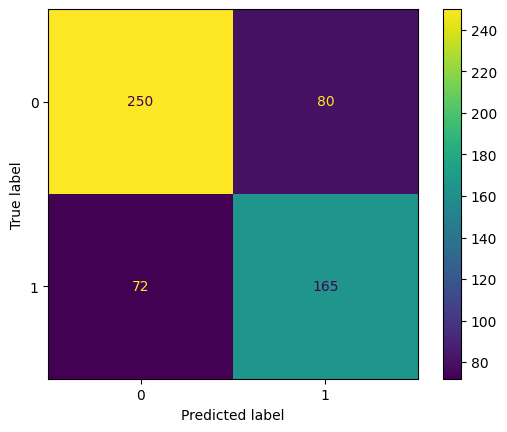

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


filename1 ='Models/classifier_XGB_Classifier.sav'
gradientBoosting_model = pickle.load(open(filename1, 'rb'))

# train_pred = gradientBoosting_model.predict(X_train)
test_pred = gradientBoosting_model.predict(X_test)

ax = plt.subplot(1,1,1)
ax.grid(False)

cfm = confusion_matrix(y_test, test_pred)
cfm_display = ConfusionMatrixDisplay(confusion_matrix=cfm)
cfm_display.plot(ax=ax)
plt.savefig("Confusion_Matrix.svg")